In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [2]:
df=pd.read_csv('http://taanila.fi/beer.csv')
df.index=pd.to_datetime(df['Month'],format='%Y-%m')
df=df.drop('Month',axis=1)
df.head()

,Monthly beer production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9


In [3]:
series=df
index=pd.date_range('1987-04-01',periods=100, freq='MS')
data=pd.DataFrame(series,index=index)
data.columns=['Kaljaa']

In [4]:
fit1=ExponentialSmoothing(data['Kaljaa'],seasonal_periods=4,trend='add',seasonal='mul').fit()

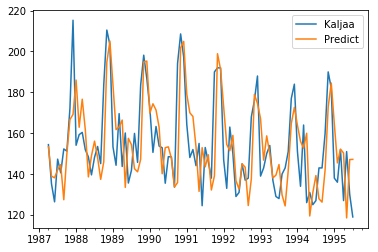

In [5]:
data['Predict']=fit1.fittedvalues
data.plot()

In [6]:
sqrt(mean_squared_error(data['Kaljaa'], data['Predict']))


18.11570125138223

In [7]:
mean_absolute_error(data['Kaljaa'], data['Predict'])

14.070970646534695

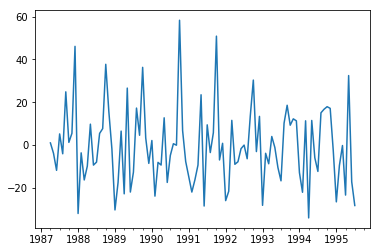

In [8]:
data['Resid']=fit1.resid

data['Resid'].plot()

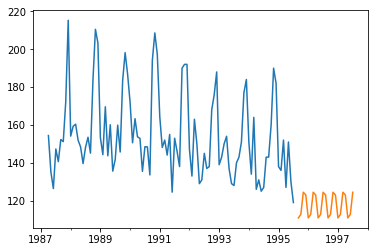

In [26]:
index=pd.date_range('1995-09-01', periods=24, freq='MS')
datap=pd.DataFrame(fit1.forecast(24), index=index)
datap.columns=['Predict']
data['Kaljaa'].plot()
datap['Predict'].plot()


In [10]:
fit1.params

{'smoothing_level': 0.8066553181361251,
 'smoothing_slope': 2.181915777310603e-10,
 'smoothing_seasonal': 0.0,
 'damping_slope': nan,
 'initial_level': 161.11760363840642,
 'initial_slope': 5.932469441793621e-07,
 'initial_seasons': array([0.9519318 , 0.85795466, 0.872058  , 0.96283125]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

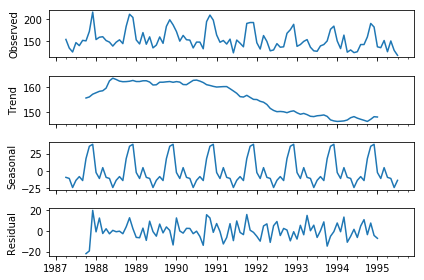

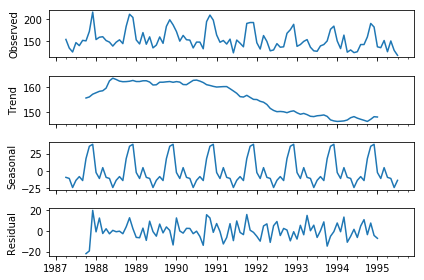

In [11]:
from statsmodels.tsa.api import seasonal_decompose
seasonal_decompose(data['Kaljaa']).plot()

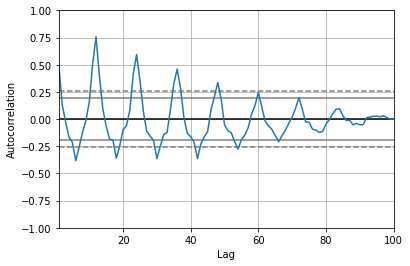

In [27]:
from pandas.plotting import autocorrelation_plot 
autocorrelation_plot(data['Kaljaa'])